## SpotiPy-Wrapped
#### By: Patrick D
### Usage Instructions:
1) Request your personal data from Spotify:  spotify.com -> my profile -> privacy -> request personal data -> wait a few days  
2) Unzip files into the input folder within this directory  
3) Change the 'directory' variable to point to your folder  
4) Run the notebook  
5) Change input variables of functions to get more specific information  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import os.path
from pathlib import Path 
import time
import datetime

import cleaner
import helper
# Jupyter theming options: 
# from jupyterthemes import jtplot
# jtplot.style()

### Data Cleaning

In [2]:
# Import cleaner.py functions
from cleaner import *
# Import helper.py functions
from helper import *

In [3]:
# create listening history dataframe from desired directory within input folder
print(os.getcwd())
directory = Path('input/06-14-22') # change this to '/input/your-directory-name'
his = read_history(directory)

# uncomment this if you want your dataframe output as a csv (change end of directory to your desired one)
# his.to_csv('~/Documents/Python/Spotify-Analysis/input/12-06-21/his.csv', index = False)

his.tail(5)

/Users/patrick/Documents/Python/SpotiPy-Wrapped
Files Included: 7 

Unique Values:
endTime       46529
artistName     2083
trackName      5674
msPlayed      14797
dtype: int64


,endTime,artistName,trackName,msPlayed
169,2022-06-13 21:46,The Killers,Smile Like You Mean It,1718
170,2022-06-13 21:49,Phoebe Bridgers,ICU,190093
171,2022-06-13 21:49,Franz Ferdinand,Take Me Out,1184
172,2022-06-13 21:49,Lorenzo & Co,Our Secret,2921
173,2022-06-13 21:53,The Strokes,Reptilia,219826


In [4]:
skipped = sort_skipped(his)
unskipped = sort_unskipped(his)

tracks = get_tracks(unskipped)
artists = get_artists(unskipped)

/Users/patrick/Documents/Python/SpotiPy-Wrapped/cleaner.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unskipped['endTime'] = pd.to_datetime(unskipped['endTime'])


### Graphs

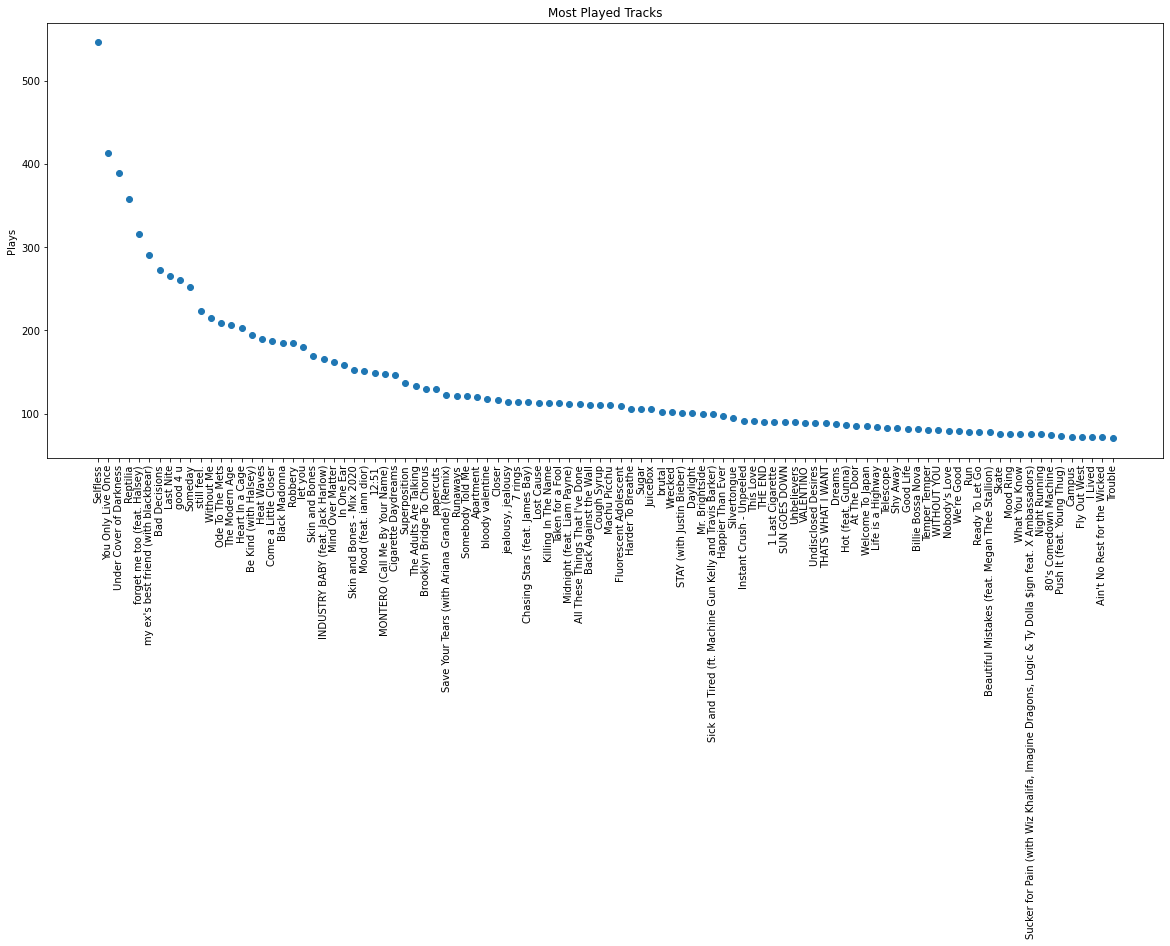

In [5]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Tracks')
plt.ylabel('Plays')
plt.show()

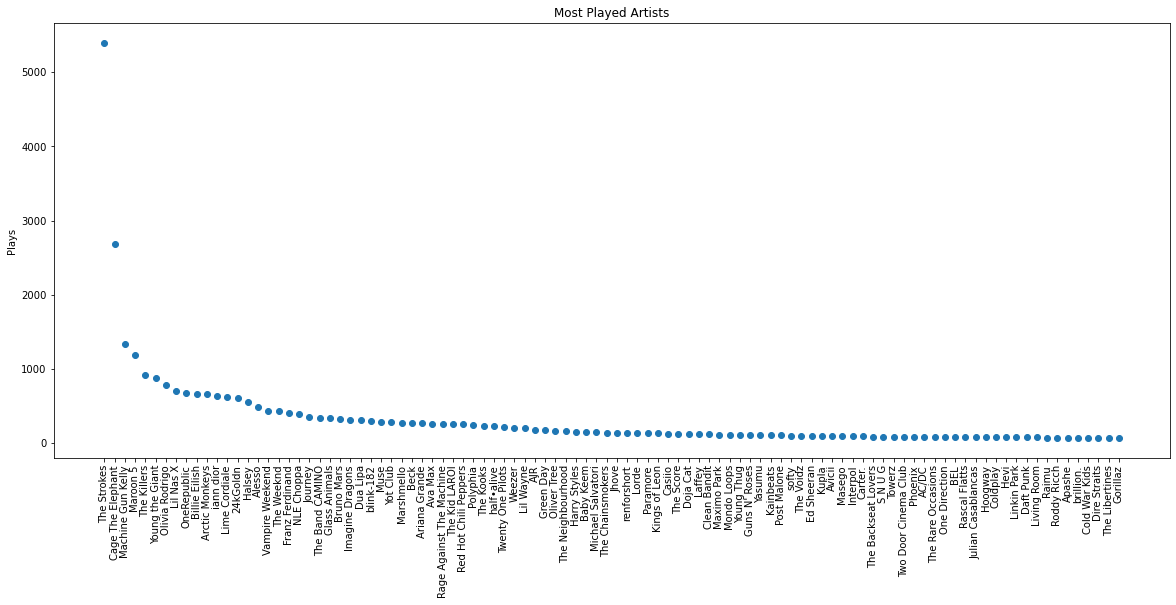

In [6]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Artists')
plt.ylabel('Plays')
plt.show()

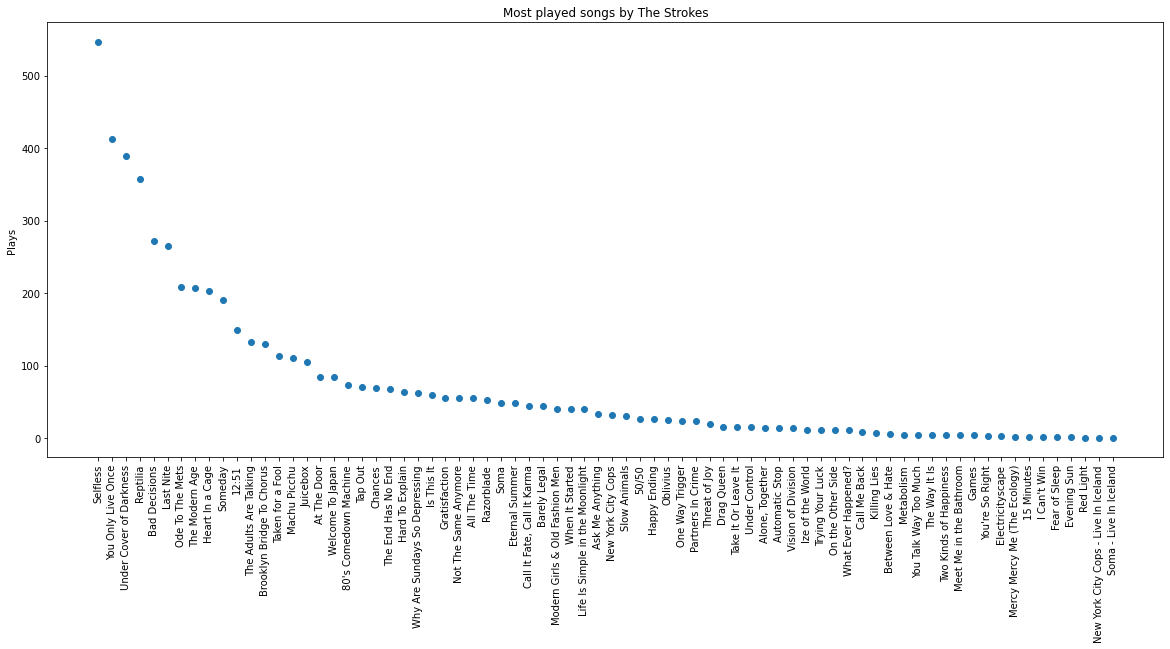

In [7]:
plotArtist("The Strokes", 100)

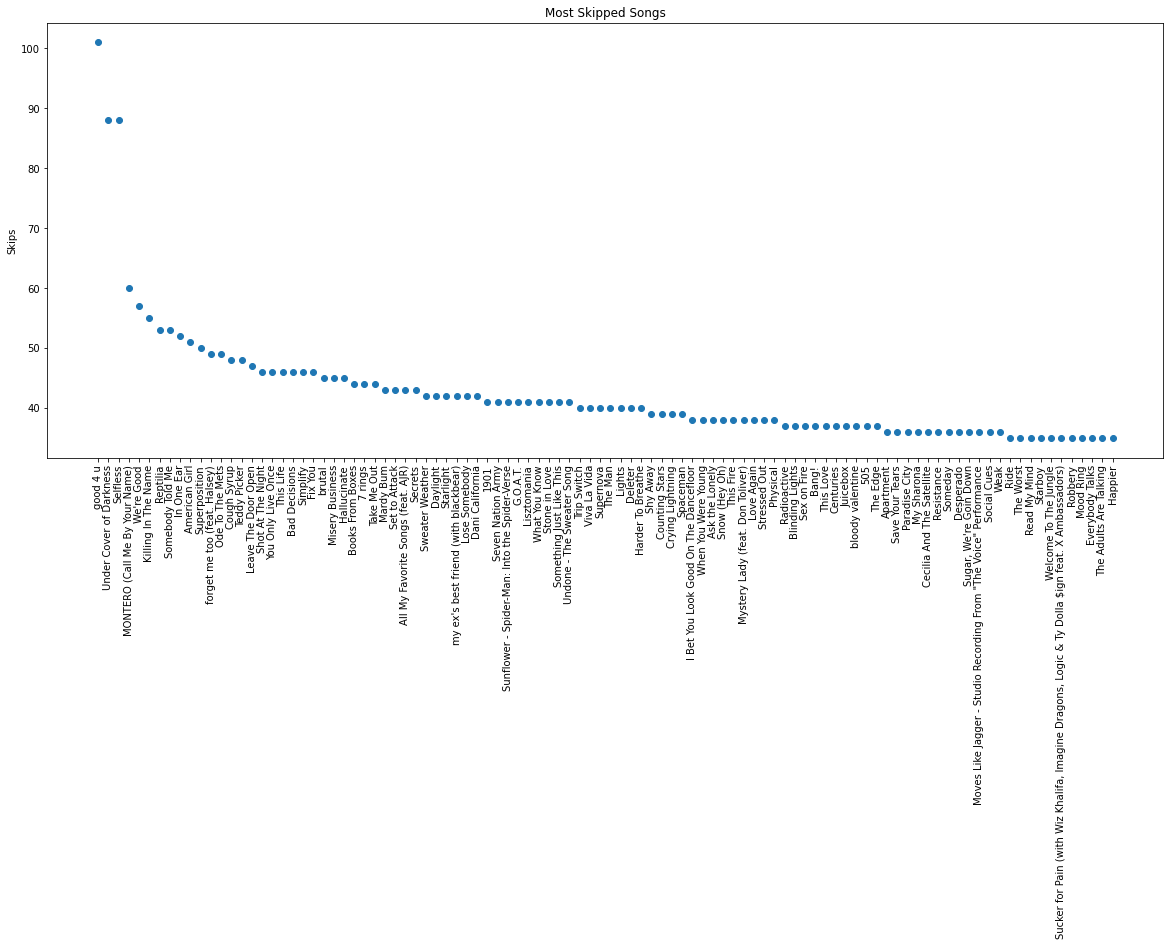

In [8]:
skipped_tracks = skipped['trackName'].value_counts()
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Songs')
plt.ylabel('Skips')
plt.show()

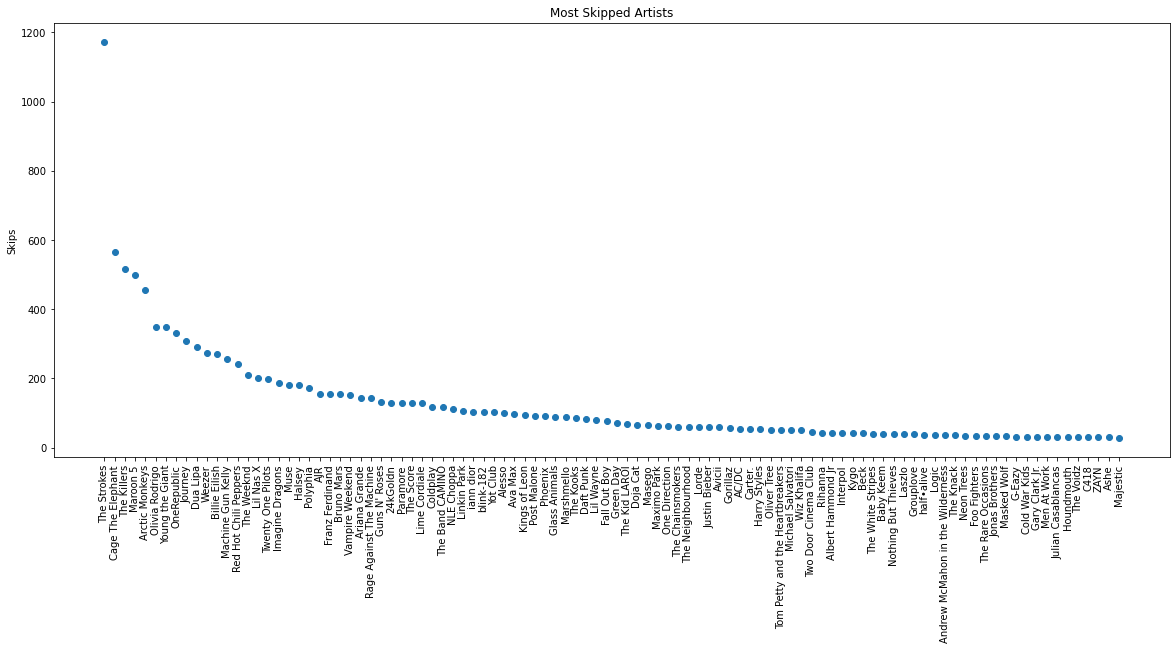

In [9]:
skipped_artists = skipped['artistName'].value_counts()
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Artists')
plt.ylabel('Skips')
plt.show()

### Other Information

In [10]:
# change n to find your n top songs
n = 10
print(topSongPlays(n))

Your top 10 songs: 
Song                       Plays
Selfless                                546
You Only Live Once                      413
Under Cover of Darkness                 389
Reptilia                                358
forget me too (feat. Halsey)            316
my ex's best friend (with blackbear)    291
Bad Decisions                           272
Last Nite                               265
good 4 u                                260
Someday                                 252
Name: trackName, dtype: int64


In [11]:
# Get playtime
t = playtime(unskipped)

Total minutes listened: 155621
Total hours listened: 2593.6833333333334


### Artist/Song specific information

In [12]:
artist = 'The Crystal Casino Band' # change this to an artist of your choice (case sensitive)
temp = artistPlayCount(artist)

You have listened to The Crystal Casino Band endTime       27
artistName     1
trackName      2
msPlayed       5
dtype: int64 times.


In [13]:
track = "Kilby Girl" # change this to a song name of your choice (case sensitive)
temp = songPlayCount(track)

You have listened to Kilby Girl endTime       40
artistName     1
trackName      1
msPlayed      11
dtype: int64 times.


### Timeframe specific information

In [14]:
# Plot top artists since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2022-01-01' # change this
topArtistsTimeframe(timeframe)

The Strokes          2124
Cage The Elephant    1593
iann dior             633
24kGoldn              608
Machine Gun Kelly     540
The Killers           400
Maroon 5              394
Vampire Weekend       376
Franz Ferdinand       304
Arctic Monkeys        291
Name: artistName, dtype: int64

In [15]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2022-01-01' # change this
topSongsTimeframe(timeframe)

Selfless                                                    287
let you                                                     180
Mood (feat. iann dior)                                      151
Under Cover of Darkness                                     142
You Only Live Once                                          140
Reptilia                                                    111
Back Against the Wall                                       109
Bad Decisions                                               102
Sick and Tired (ft. Machine Gun Kelly and Travis Barker)     99
Last Nite                                                    97
Name: trackName, dtype: int64

In [16]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2022-01-01' # change this - lower bound
timeframe_upper = '2022-10-30' # change this - upper bound
topArtistsTimeframeBounded(timeframe_lower, timeframe_upper)

The Strokes          2124
Cage The Elephant    1593
iann dior             633
24kGoldn              608
Machine Gun Kelly     540
The Killers           400
Maroon 5              394
Vampire Weekend       376
Franz Ferdinand       304
Arctic Monkeys        291
Name: artistName, dtype: int64

In [17]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2022-01-01' # change this - lower bound
timeframe_upper = '2022-10-31' # change this - upper bound
topSongsTimeframeBounded(timeframe_lower, timeframe_upper)

Selfless                                                    287
let you                                                     180
Mood (feat. iann dior)                                      151
Under Cover of Darkness                                     142
You Only Live Once                                          140
Reptilia                                                    111
Back Against the Wall                                       109
Bad Decisions                                               102
Sick and Tired (ft. Machine Gun Kelly and Travis Barker)     99
Last Nite                                                    97
Come a Little Closer                                         96
my ex's best friend (with blackbear)                         91
VALENTINO                                                    89
Ode To The Mets                                              79
Cigarette Daydreams                                          77
Skin and Bones - Mix 2020               

In [18]:
# Get listening time for a given month
# inputs - month number and year
month = 5 
year = 2022 
listeningTimeMonth(month, year)

243.76688444444443

In [19]:
# Get listening time for a given artist in hours
# Change artist name
artist = 'Cage The Elephant'
listeningTimeArtist(artist)

160.6518811111111